In [1]:
import os
import torch
import torchvision
import torch.nn as nn
from torchvision import transforms
from torchvision.utils import save_image
from torch.autograd import Variable
import matplotlib.pyplot as plt
import pylab
import numpy as np
%load_ext autoreload
%autoreload 2

In [2]:
num_gpu = 1 if torch.cuda.is_available() else 0

# load the models
from dcgan import Discriminator, Generator

D = Discriminator(ngpu=1).eval()
G = Generator(ngpu=1).eval()

# load weights
D.load_state_dict(torch.load('weights/netD_epoch_299.pth'))
G.load_state_dict(torch.load('weights/netG_epoch_299.pth'))
if torch.cuda.is_available():
    D = D.cuda()
    G = G.cuda()

# generate some images

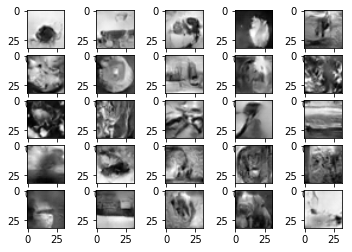

In [8]:
batch_size = 25
latent_size = 100

fixed_noise = torch.randn(batch_size, latent_size, 1, 1)
if torch.cuda.is_available():
    fixed_noise = fixed_noise.cuda()
fake_images = G(fixed_noise)


# z = torch.randn(batch_size, latent_size).cuda()
# z = Variable(z)
# fake_images = G(z)

fake_images_np = fake_images.cpu().detach().numpy()
fake_images_np = fake_images_np.reshape(fake_images_np.shape[0], 32, 32)
# fake_images_np = fake_images_np.transpose((0, 2, 3, 1))
R, C = 5, 5
for i in range(batch_size):
    plt.subplot(R, C, i + 1)
    plt.imshow(fake_images_np[i], interpolation='bilinear', cmap='gray')
plt.show()

# run discriminator

In [9]:
outputs = D(fake_images)
print(outputs)

tensor([8.7170e-03, 2.1843e-03, 6.8405e-05, 4.0785e-04, 6.0980e-03, 1.7407e-04,
        2.1155e-03, 3.5355e-03, 1.0314e-03, 6.3222e-05, 1.1164e-06, 1.9821e-02,
        7.8570e-05, 7.5287e-04, 7.1768e-06, 1.8815e-03, 6.2885e-07, 2.4355e-03,
        5.5612e-04, 1.8067e-02, 7.9757e-04, 2.7914e-03, 3.0696e-04, 2.6605e-05,
        8.8829e-03], device='cuda:0', grad_fn=<SqueezeBackward1>)
